# Точка, выпуклый многоугольник, угловой метод
1. Задать вершинами выпуклый 7 угольник и координатами две точки с абсциссами и ординатами между габаритными координатами (создать прямоугольник, который покрывает N-угольник) 7 угольника
2. Построить алгоритм определения положения точки. Внутри или снаружи 7-угольника.

# Точка, простой многоугольник
Многоугольник задан вершинами:
- 1,1
- 2,2
- 4,0
- 6,4
- 4,6
- 2,4
- 0,6
- И под конец обратно в 1,1

Определить положение точек:
- 1.5;4.2
- 3.5;5
- 4.5;2

(3, -1e-16) False
(7, 7) False


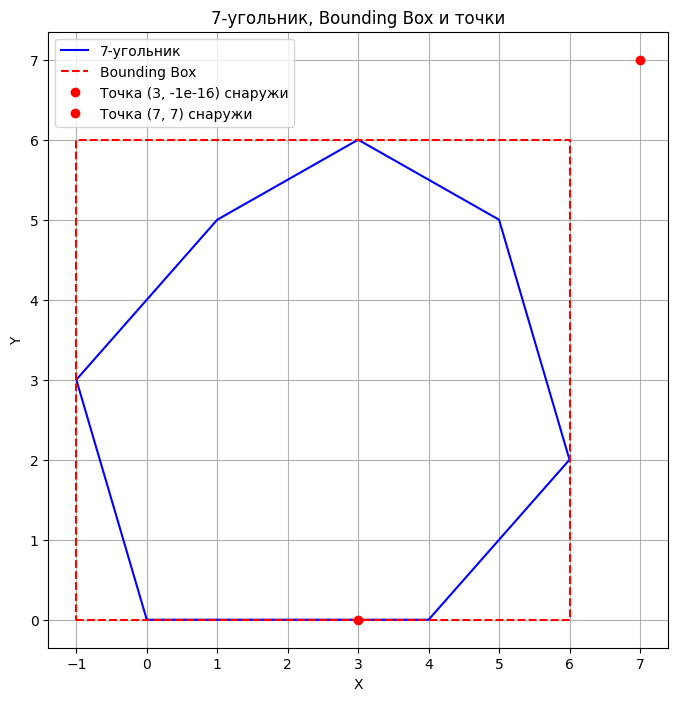

In [26]:
import math

def is_point_inside_bounding_box(bbox, point):
    (min_x, min_y), (max_x, max_y) = bbox
    return min_x <= point[0] <= max_x and min_y <= point[1] <= max_y

def calculate_bounding_box(polygon):
    min_x = min(p[0] for p in polygon)
    max_x = max(p[0] for p in polygon)
    min_y = min(p[1] for p in polygon)
    max_y = max(p[1] for p in polygon)
    return (min_x, min_y), (max_x, max_y)

def is_point_inside_polygon(polygon, point):
    def angle_between(v1, v2):
        dot_product = v1[0] * v2[0] + v1[1] * v2[1]
        magnitude_v1 = math.sqrt(v1[0] ** 2 + v1[1] ** 2)
        magnitude_v2 = math.sqrt(v2[0] ** 2 + v2[1] ** 2)
        return math.acos(dot_product / (magnitude_v1 * magnitude_v2))

    total_angle = 0
    n = len(polygon)

    for i in range(n):
        v1 = (polygon[i][0] - point[0], polygon[i][1] - point[1])
        v2 = (polygon[(i + 1) % n][0] - point[0], polygon[(i + 1) % n][1] - point[1])
        total_angle += angle_between(v1, v2)

    return math.isclose(total_angle, 2 * math.pi, rel_tol=1e-14)

def plot_polygon_and_points(polygon, points):
    polygon_x, polygon_y = zip(*polygon)
    polygon_x += (polygon_x[0],)
    polygon_y += (polygon_y[0],)

    plt.figure(figsize=(8, 8))
    plt.plot(polygon_x, polygon_y, 'b-', label='7-угольник')

    bbox = calculate_bounding_box(polygon)
    bbox_x = [bbox[0][0], bbox[1][0], bbox[1][0], bbox[0][0], bbox[0][0]]
    bbox_y = [bbox[0][1], bbox[0][1], bbox[1][1], bbox[1][1], bbox[0][1]]
    plt.plot(bbox_x, bbox_y, 'r--', label='Bounding Box')

    for point in points:
        if is_point_inside_bounding_box(bbox, point):
            color = 'g' if is_point_inside_polygon(polygon, point) else 'r'
        else:
            color = 'r'
        plt.plot(point[0], point[1], 'o', color=color, label=f'Точка {point} внутри' if color == 'g' else f'Точка {point} снаружи')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('7-угольник, Bounding Box и точки')
    plt.legend()
    plt.grid(True)
    plt.show()

polygon = [(0, 0), (4, 0), (6, 2), (5, 5), (3, 6), (1, 5), (-1, 3)]
point_inside = (3, -1e-16)
point_outside = (7, 7)
points = [point_inside, point_outside]

for point in points:
    bbox = calculate_bounding_box(polygon)
    if is_point_inside_bounding_box(bbox, point):
        print(point, is_point_inside_polygon(polygon, point))
    else:
        print(point, False)

plot_polygon_and_points(polygon, points)

Точка (1.5, 4.2) внутри многоугольника: True
Точка (3.5, 5) внутри многоугольника: True
Точка (0.5, 3) внутри многоугольника: False


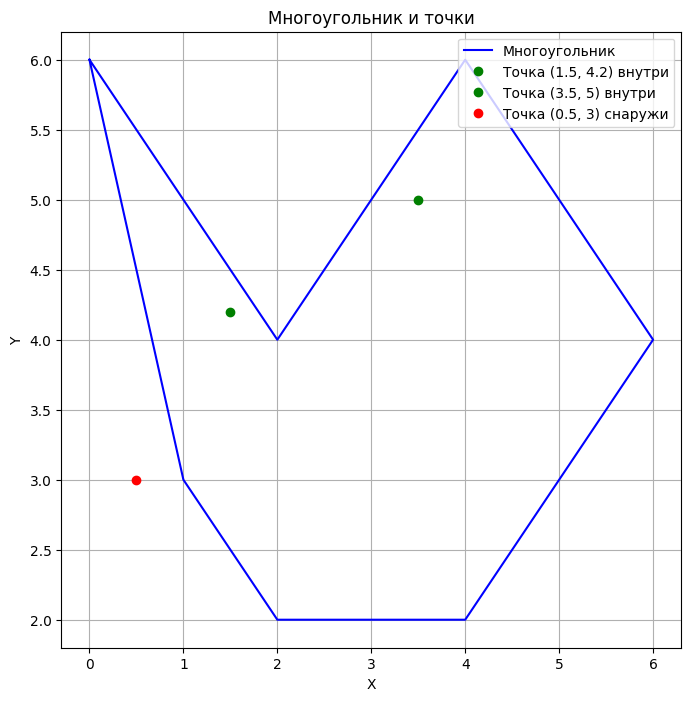

In [22]:
import matplotlib.pyplot as plt

def is_point_inside_polygon_ray_casting(polygon, point):
    x, y = point
    n = len(polygon)
    inside = False

    for i in range(n):
        x0, y0 = polygon[i]
        x1, y1 = polygon[(i + 1) % n]
        if ((y0 > y) != (y1 > y)) and (x < (x1 - x0) * (y - y0) / (y1 - y0) + x0):
            inside = not inside

    return inside

def plot_polygon_and_points(polygon, points):
    polygon_x, polygon_y = zip(*polygon)
    polygon_x += (polygon_x[0],)
    polygon_y += (polygon_y[0],)

    plt.figure(figsize=(8, 8))
    plt.plot(polygon_x, polygon_y, 'b-', label='Многоугольник')

    for point in points:
        color = 'g' if is_point_inside_polygon_ray_casting(polygon, point) else 'r'
        plt.plot(point[0], point[1], 'o', color=color, label=f'Точка {point} внутри' if color == 'g' else f'Точка {point} снаружи')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Многоугольник и точки')
    plt.legend()
    plt.grid(True)
    plt.show()

polygon = [(0, 6), (2, 4), (4, 6), (6, 4), (4, 2), (2, 2), (1, 3)]
points = [(1.5, 4.2), (3.5, 5), (0.5, 3)]

for point in points:
    print(f"Точка {point} внутри многоугольника: {is_point_inside_polygon_ray_casting(polygon, point)}")

plot_polygon_and_points(polygon, points)